In [3]:
import numpy as np
from scipy.sparse import coo_matrix

def softmaxCost(theta, numClasses, inputSize, decay, data, labels):
  """Computes and returns the (cost, gradient)

  numClasses - the number of classes 
  inputSize - the size N of the input vector
  lambda - weight decay parameter
  data - the N x M input matrix, where each row data[i, :] corresponds to
         a single sample
  labels - an M x 1 matrix containing the labels corresponding for the input data
  """

  # Unroll the parameters from theta
  theta = np.reshape(theta, (numClasses, inputSize))

  numCases = data.shape[1]
  groundTruth = coo_matrix((np.ones(numCases, dtype = np.uint8),
                            (labels, np.arange(numCases)))  ).toarray()
  cost = 0;
  thetagrad = np.zeros((numClasses, inputSize))
  
  ## ---------- YOUR CODE HERE --------------------------------------
  #  Instructions: Compute the cost and gradient for softmax regression.
  #                You need to compute thetagrad and cost.
  #                The groundTruth matrix might come in handy.

  compute_matrix=theta.dot(data)
  overflow=np.max(compute_matrix)
  compute_matrix_scaled=compute_matrix-overflow
  compute_matrix_exp=np.exp(compute_matrix_scaled)
  compute_matrix_p= compute_matrix_exp/np.sum(compute_matrix_exp,axis=0)
  cost  = np.multiply(groundTruth, np.log(compute_matrix_p))
  cost = -(np.sum(cost) / data.shape[1])
  theta_squared = np.multiply(theta, theta)
  regu = 0.5 *decay  * np.sum(theta_squared)
  cost=cost+regu
  
 
  thetagrad = -np.dot(groundTruth - compute_matrix_p, data.T)
  thetagrad = thetagrad / data.shape[1] + decay * theta
  
  # ------------------------------------------------------------------
  # Unroll the gradient matrices into a vector for the optimization function.
  grad = thetagrad.ravel()

  return cost, grad






def softmaxGrad(theta, numClasses, inputSize, decay, data, labels):
  """Computes and returns the (cost, gradient)

  numClasses - the number of classes 
  inputSize - the size N of the input vector
  lambda - weight decay parameter
  data - the N x M input matrix, where each row data[i, :] corresponds to
         a single sample
  labels - an M x 1 matrix containing the labels corresponding for the input data
  """

  # Unroll the parameters from theta
  theta = np.reshape(theta, (numClasses, inputSize))

  numCases = data.shape[1]

  groundTruth = coo_matrix((np.ones(numCases, dtype = np.uint8),
                            (labels, np.arange(numCases)))).toarray()
  cost = 0;
  thetagrad = np.zeros((numClasses, inputSize))
  
  ## ---------- YOUR CODE HERE --------------------------------------
  #  Instructions: Compute the cost and gradient for softmax regression.
  #                You need to compute thetagrad and cost.
  #                The groundTruth matrix might come in handy.

  compute_matrix=theta.dot(data)
  overflow=np.max(compute_matrix)
  compute_matrix_scaled=compute_matrix-overflow
  compute_matrix_exp=np.exp(compute_matrix_scaled)
  compute_matrix_p= compute_matrix_exp/np.sum(compute_matrix_exp,axis=0)
  
 
  thetagrad = -np.dot(groundTruth - compute_matrix_p, data.T)
  thetagrad = thetagrad / data.shape[1] + decay * theta
  
  # ------------------------------------------------------------------
  # Unroll the gradient matrices into a vector for the optimization function.
  grad = thetagrad.ravel()

  return  grad

  

def softmaxPredict(theta, data):
  """Computes and returns the softmax predictions in the input data.

  theta - model parameters trained using fmin_l_bfgs_bin softmaxExercise.py,
          a numClasses x inputSize matrix.
  data - the M x N input matrix, where each row data[i,:] corresponds to
         a single sample.
  """

  #  Your code should produce the prediction matrix pred,
  #  where pred(i) is argmax_c P(c | x(i)).
 
  ## ---------- YOUR CODE HERE --------------------------------------
  #  Instructions: Compute pred using theta assuming that the labels start 
  #                from 0.
  pred=np.zeros(data.shape[1])
  compute_matrix=theta.dot(data)
  #overflow=np.max(compute_matrix)
  #compute_matrix=compute_matrix-overflow
  #compute_matrix_exp=np.exp(compute_matrix)
  #compute_matrix_p= compute_matrix_exp/np.sum(compute_matrix_exp,axis=0)
  #pred=np.argmax(compute_matrix_p, axis = 0)
  pred=np.argmax(compute_matrix, axis = 0)

  # ---------------------------------------------------------------------

  return pred

Accuracy for l_bfgs method : 84.584%.


/home/rajib/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Accuracy for minibatch: 84.987%.
Accuracy for linear model Logistic Regression : 83.311%.


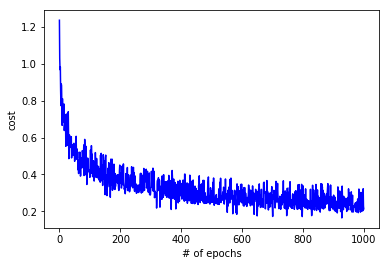

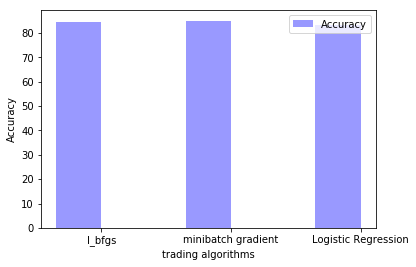

In [4]:
import argparse
import sys
from matplotlib import pyplot as plt
import numpy as np
from numpy.random import randn, randint
from numpy.linalg import norm
from scipy.optimize import fmin_l_bfgs_b
%matplotlib inline


#  We also initialise some parameters used for tuning the model.

inputSize = 561 # Size of input vector 
numClasses = 6    # Number of classes 

decay = 1e-5

##======================================================================
## STEP 1: Load data
#
#

images = np.loadtxt('final_X_train.txt', delimiter=',')
labels = np.loadtxt('final_y_train.txt', delimiter=',')
images=images.T
labels=labels-1


# Randomly initialise theta
theta = 0.005 * randn(numClasses * inputSize)

##======================================================================

                                    
##======================================================================
## STEP 4: Learning parameters
#
#  Once you have verified that your gradients are correct, 
#  you can start training your softmax regression code using L-BFGS.

theta, _, _ = fmin_l_bfgs_b(softmaxCost, theta,
                            args = (numClasses, inputSize, decay, images, labels),
                            maxiter = 200, disp = 1)
# Fold parameters into a matrix format.
theta = np.reshape(theta, (numClasses, inputSize));
    
# Although we only use 100 iterations here to train a classifier for the 
# MNIST data set, in practice, training for more iterations is usually
# beneficial.

##======================================================================
## STEP 5: Testing
#
#  You should now test your model against the test images.
#  To do this, you will first need to write softmaxPredict
#  (in softmaxPredict.py), which should return predictions
#  given a softmax model and the input data.

images = np.loadtxt('final_X_test.txt', delimiter=',')
labels = np.loadtxt('final_y_test.txt', delimiter=',')
images=images.T
labels=labels-1
# You will have to implement softmaxPredict in softmax.py.
pred = softmaxPredict(theta, images)
Accuracy=[]
acc = np.mean(labels == pred)
print('Accuracy for l_bfgs method : %0.3f%%.' % (acc * 100))
acy1=acc * 100





#   minibatch gradient


images = np.loadtxt('final_X_train.txt', delimiter=',')
labels = np.loadtxt('final_y_train.txt', delimiter=',')
images=images.T
labels=labels-1
theta = 0.005 * randn(numClasses * inputSize)


minibatch_size=100
epochs=1000
eta=1.0
n_batches=int(images.shape[1]/minibatch_size)
image=np.zeros((inputSize,minibatch_size))
label=np.zeros((minibatch_size))

m=images.shape[1]
r = np.random.permutation(m)
images=images[:,r]
labels=labels[r]
image=np.array_split(images, n_batches, axis=1)
label=np.array_split(labels, n_batches, axis=0)

total_cost=[]
n_epochs=[]
cst=0.0
for i in range (epochs):
  k=np.random.permutation(n_batches)
  cst=0.0
  for j in (k): 
    cost,grad= softmaxCost(theta, numClasses, inputSize, decay, image[j], label[j])
    theta=theta-(eta*grad)/(minibatch_size)
    cst=cst+cost
  total_cost=np.append(total_cost,cost)
  n_epochs=np.append(n_epochs,i)


plt.xlabel('# of epochs')
plt.ylabel('cost')
plt.plot( n_epochs,total_cost , 'b-')
plt.legend()


plt.savefig('train.png')


theta = np.reshape(theta, (numClasses, inputSize))
    
images = np.loadtxt('final_X_test.txt', delimiter=',')
labels = np.loadtxt('final_y_test.txt', delimiter=',')


images=images.T
labels=labels-1
pred = softmaxPredict(theta, images)

acc = np.mean(labels == pred)
print('Accuracy for minibatch: %0.3f%%.' % (acc * 100))
acy2=acc * 100

#---------------------------
# using the scikit-learn package

from sklearn import linear_model



images = np.loadtxt('final_X_train.txt', delimiter=',')
labels = np.loadtxt('final_y_train.txt', delimiter=',')

labels=labels-1

numExamples = images.shape[0]

C = 1.0/decay


softmax = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=C, fit_intercept=True,
 intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100,
  multi_class='multinomial', verbose=0, warm_start=False, n_jobs=1)
softmax.fit(images,labels)

images = np.loadtxt('final_X_test.txt', delimiter=',')
labels = np.loadtxt('final_y_test.txt', delimiter=',')


labels=labels-1


pred = softmax.predict(images)

acc = np.mean(labels == pred)
print('Accuracy for linear model Logistic Regression : %0.3f%%.' % (acc * 100))
acy3=acc * 100

n_groups = 3

Accuracy = (acy1,acy2,acy3)


fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, Accuracy, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Accuracy')


plt.xlabel('trading algorithms')
plt.ylabel('Accuracy')
plt.xticks(index + bar_width / 2, ('l_bfgs', 'minibatch gradient', 'Logistic Regression'))
plt.legend()

#plt.tight_layout()
plt.show()
plt.savefig('compare.png')
